In [1]:
import numpy as np
import matplotlib.pyplot as plt

Domain, bathymetry and initial condition

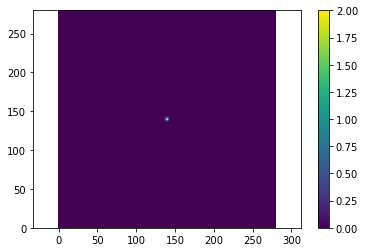

In [2]:
x = np.arange(-70,70,0.5)
y = np.arange(-70,70,0.5)
nx = x.shape[0]
ny = y.shape[0]
x,y = np.meshgrid(x,y,indexing='ij')
h = 0.2*np.ones((nx,ny))
etainit = 2*np.exp(-(x**2+y**2))
plt.pcolormesh(etainit)
plt.axis('equal')
plt.colorbar()
plt.show()

Initialize simulation

In [3]:
dt = 0.2
dx = np.diff(x[:,0])[0]
dy = np.diff(y[0,:])[0]

g = 9.81

eta0 = eta1 = np.zeros((nx,ny))
eta0 = etainit
P0 = P1 =  np.zeros((nx-1  ,ny)) # P[i,j] = P_{i+1/2,j}, i=0..nx-1, j=0..ny-1
Q0 = Q1 =  np.zeros((nx  ,ny-1)) # Q[i,j] = Q_{i,j+1/2}
t = 0.0
# eta_0,j, and eta_0,nx-1 are defined with boundary conditions
# that's why only P_{1/2} to P_{(nx-1)-1/2} are needed


$\eta^{n+1/2}_{ij} = \eta^{n-1/2}_{ij} - \frac{\Delta t}{\Delta x}(P^n_{i+1/2,j} - P^n_{i-1/2,j}) 
        - \frac{\Delta t}{\Delta y}(Q^n_{i,j+1/2} - Q^n_{i,j-1/2})$

$ P ^{n+1}_{i+1/2,j} =  P ^{n}_{i+1/2,j} + gh \frac{\Delta t}{\Delta x}(\eta_{i+1,j}^{n+1/2}-\eta_{i,j}^{n+1/2})$

$ Q ^{n+1}_{i,j+1/2} =  Q ^{n}_{i,j+1/2} + gh \frac{\Delta t}{\Delta y}(\eta_{i,j+1}^{n+1/2}-\eta_{i,j}^{n+1/2})$

Loop until adimensional time $t' = t\sqrt(gh) = 40$

adimensional time =  39.780280542


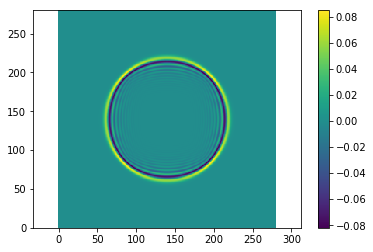

In [4]:
for i in range(142):
    eta1[1:-1,1:-1] = eta0[1:-1,1:-1]-dt/dx*(P0[1:,1:-1]-P0[:-1,1:-1])-dt/dy*(Q0[1:-1,1:]-Q0[1:-1,:-1])
    P1 = P0-g*h[:-1,:]*dt/dx*(eta1[1:,:]-eta0[:-1,:])
    Q1 = Q0-g*h[:,:-1]*dt/dy*(eta1[:,1:]-eta0[:,:-1])
    eta0 = eta1
    P0 = P1
    Q0 = Q1
    t+=dt
print('adimensional time = ',t*np.sqrt(g*0.2))
plt.pcolormesh(eta0)
plt.colorbar()
plt.axis('equal')
plt.show()

Get the figure to compare with the analytical solution

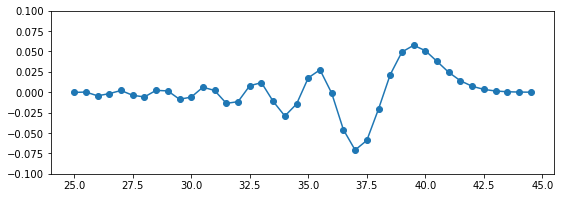

In [5]:
plt.figure(figsize=(9,3))
plt.plot(x[190:230,140],eta0[190:230,140],'o-')
plt.ylim(-0.1,0.1)
plt.show()

Compare with the results of page 44, figure 3.3a of  Cho's thesis (1995)

https://www.mendeley.com/viewer/?fileId=10a748bb-f7a7-19fb-445f-0fff14a7868e&documentId=d83859b2-4b30-3987-a181-a1675298e7e1